## CASE: Empresa de aviação brasileira - Previsão de atraso

** Objetivo: ** Montar uma campanha de **CRM** informando aos clientes sobre a possibilidade de atrasos em seus voos em situações as quais a empresa não pode atuar. 

** Base de dados: ** Dataset brasileiro com mais de um milhão de linhas disponível em: https://www.kaggle.com/ramirobentes/flights-in-brazil



** O que é CRM? ** 
Um dos conceitos de CRM mais adequados é: CRM é uma estratégia de negócios focada no cliente que visa melhorar a satisfação, antecipar as necessidades e desejos dos consumidores, otimizar a rentabilidade, aumentar receitas e a assertividade de suas campanhas de captação de novos clientes.


### Importando as bibliotecas que serão utilizadas no código

In [1]:
import numpy as np # algebra linear 
import pandas as pd # processamento de dados, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import math

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline 

In [2]:
df = pd.read_csv('BrFlights2.csv', encoding='latin1')

In [3]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig,Atraso
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713,NaN
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,NaN
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,NaN
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,NaN
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,NaN


** Queremos ver algumas informações básicas sobre o nosso dataset.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485568 entries, 0 to 1485567
Data columns (total 21 columns):
Voos                    1485568 non-null object
Companhia.Aerea         1485568 non-null object
Codigo.Tipo.Linha       1485568 non-null object
Partida.Prevista        1485568 non-null object
Partida.Real            1333816 non-null object
Chegada.Prevista        1485568 non-null object
Chegada.Real            1333816 non-null object
Situacao.Voo            1485568 non-null object
Codigo.Justificativa    613714 non-null object
Aeroporto.Origem        1485568 non-null object
Cidade.Origem           1485568 non-null object
Estado.Origem           1485568 non-null object
Pais.Origem             1485568 non-null object
Aeroporto.Destino       1485567 non-null object
Cidade.Destino          1485567 non-null object
Estado.Destino          1485567 non-null object
Pais.Destino            1485567 non-null object
LongDest                1485567 non-null float64
LatDest                

In [5]:
df.isnull().sum()

Voos                         0
Companhia.Aerea              0
Codigo.Tipo.Linha            0
Partida.Prevista             0
Partida.Real            151752
Chegada.Prevista             0
Chegada.Real            151752
Situacao.Voo                 0
Codigo.Justificativa    871854
Aeroporto.Origem             0
Cidade.Origem                0
Estado.Origem                0
Pais.Origem                  0
Aeroporto.Destino            1
Cidade.Destino               1
Estado.Destino               1
Pais.Destino                 1
LongDest                     1
LatDest                      1
LongOrig                     1
LatOrig                      1
dtype: int64

** Vemos que possuímos alguns valores nulos no nosso dataset. Precisamos verificar o que são esses valores e como tratá-los. **


In [6]:
df['Situacao.Voo'].value_counts()

Realizado    1333816
Cancelado     151752
Name: Situacao.Voo, dtype: int64

In [7]:
df[df['Situacao.Voo'] == 'Cancelado'].isnull().sum()

Voos                         0
Companhia.Aerea              0
Codigo.Tipo.Linha            0
Partida.Prevista             0
Partida.Real            151752
Chegada.Prevista             0
Chegada.Real            151752
Situacao.Voo                 0
Codigo.Justificativa         0
Aeroporto.Origem             0
Cidade.Origem                0
Estado.Origem                0
Pais.Origem                  0
Aeroporto.Destino            0
Cidade.Destino               0
Estado.Destino               0
Pais.Destino                 0
LongDest                     0
LatDest                      0
LongOrig                     0
LatOrig                      0
dtype: int64

** Vemos que todos os voos marcados como cancelados apresentam valores nulos nas datas de partida e chegada previstas. Sendo assim não existe inconsistências nesses dados. **


def my_autopct(pct):
    return ('%.2f' % pct) if pct > 0.8 else ''



fig = plt.figure(figsize=(15,15)) 
df['Companhia.Aerea'].value_counts().plot.pie(autopct=my_autopct)
plt.title('% dos voos totais de cada companhia')

fig = plt.figure(figsize=(15,15)) 
df['Companhia.Aerea'][df['Situacao.Voo'] == 'Cancelado'].value_counts().plot(kind='pie')
plt.grid()


plt.xticks(rotation="vertical")

### Excluindo atributos redundantes

* Podemos excluir o atributo *Voos*, uma vez que ele não acrescenta muita informação pois está diretamente correlacinado com a rota da aeronave e a companhia aérea, que por sua vez estão presentes em outros atributos. 

* Possuímos muitos atributos de localização de origem e destino no nosso dataset, porém, apenas o aeroporto de origem e destino já é suficiente para treinarmos o nosso modelo. Portanto excluímos todos os outros atributos de localização. 

In [8]:
df.drop(['Voos', 'Cidade.Origem' , 'Estado.Origem' , 'Pais.Origem','Cidade.Destino','Estado.Destino','Pais.Destino', 'LongDest' , 'LatDest' , 'LongOrig','LatOrig'], axis=1, inplace=True)

In [9]:
df['Partida.Prevista'] = pd.to_datetime(df['Partida.Prevista'])
df['Partida.Real'] = pd.to_datetime(df['Partida.Real'])
df['Chegada.Prevista'] = pd.to_datetime(df['Chegada.Prevista'])
df['Chegada.Real'] = pd.to_datetime(df['Chegada.Real'])
df.tail(100)

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino
1485468,GOL,Nacional,2015-01-26 16:33:00,2015-01-26 16:33:00,2015-01-26 17:55:00,2015-01-26 17:55:00,Realizado,NaN,Deputado Luis Eduardo Magalhaes,Guararapes - Gilberto Freyre
1485469,AZUL,Nacional,2015-01-02 15:30:00,NaT,2015-01-02 17:55:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Carajas,Tancredo Neves
1485470,GOL,Nacional,2015-01-26 16:00:00,2015-01-26 16:00:00,2015-01-26 17:55:00,2015-01-26 17:55:00,Realizado,NaN,Campo Grande,Guarulhos - Governador Andre Franco Montoro
1485471,AZUL,Regional,2015-01-27 16:35:00,NaT,2015-01-27 17:55:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Afonso Pena,Guarulhos - Governador Andre Franco Montoro
1485472,GOL,Nacional,2015-01-19 16:00:00,2015-01-19 16:00:00,2015-01-19 17:55:00,2015-01-19 17:55:00,Realizado,NaN,Campo Grande,Guarulhos - Governador Andre Franco Montoro
1485473,GOL,Internacional,2015-01-11 15:10:00,2015-01-11 15:10:00,2015-01-11 17:55:00,2015-01-11 17:55:00,Realizado,NaN,Buenos Aires,Guarulhos - Governador Andre Franco Montoro
1485474,GOL,Nacional,2015-01-02 16:33:00,2015-01-02 16:33:00,2015-01-02 17:55:00,2015-01-02 17:55:00,Realizado,NaN,Deputado Luis Eduardo Magalhaes,Guararapes - Gilberto Freyre
1485475,GOL,Nacional,2015-01-18 16:00:00,NaT,2015-01-18 17:55:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Campo Grande,Guarulhos - Governador Andre Franco Montoro
1485476,GOL,Nacional,2015-01-02 16:43:00,NaT,2015-01-02 17:55:00,NaT,Cancelado,PROGRAMADO - FERIADO NACIONAL,Tancredo Neves,Congonhas
1485477,TAM,Regional,2015-01-02 16:55:00,NaT,2015-01-02 17:55:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Hercilio Luz,Congonhas


### Transformando as variáveis de data para formato númerico


In [10]:
df['Partida.Prevista'] = pd.to_numeric(df['Partida.Prevista'])
df['Partida.Real'] = pd.to_numeric(df['Partida.Real'])
df['Chegada.Prevista'] = pd.to_numeric(df['Chegada.Prevista'])
df['Chegada.Real'] = pd.to_numeric(df['Chegada.Real'])


df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,Internacional,1454144280000000000,1454144280000000000,1454150100000000000,1454150100000000000,Realizado,NaN,Afonso Pena,Salgado Filho
1,AMERICAN AIRLINES INC,Internacional,1452687180000000000,1452687180000000000,1452720600000000000,1452720600000000000,Realizado,NaN,Salgado Filho,Miami
2,AMERICAN AIRLINES INC,Internacional,1454069580000000000,1454069580000000000,1454103000000000000,1454103000000000000,Realizado,NaN,Salgado Filho,Miami
3,AMERICAN AIRLINES INC,Internacional,1453205580000000000,1453118580000000000,1453239000000000000,1453149660000000000,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Miami
4,AMERICAN AIRLINES INC,Internacional,1454155980000000000,1454155980000000000,1454189400000000000,1454189400000000000,Realizado,NaN,Salgado Filho,Miami


### Verificando quais voos atrasaram

In [11]:
Atrasos_Partida = df[(df['Partida.Prevista']-df['Partida.Real'] < 0) & (df['Situacao.Voo'] != 'Cancelado')].shape[0]
Atrasos_Chegada = df[(df['Chegada.Prevista']-df['Chegada.Real'] < 0) & (df['Situacao.Voo'] != 'Cancelado')].shape[0]
Atrasos_Partida_Chegada = df[(df['Partida.Prevista']-df['Partida.Real'] < 0) & (df['Chegada.Prevista']-df['Chegada.Real'] < 0) & (df['Situacao.Voo'] != 'Cancelado')].shape[0]

Atrasos_Total = Atrasos_Partida_Chegada + (Atrasos_Chegada - Atrasos_Partida_Chegada) + (Atrasos_Partida - Atrasos_Partida_Chegada )

print('Voos que atrasaram na partida: ', Atrasos_Partida)
print('Voos que atrasaram na chegada: ', Atrasos_Chegada)
print('Voos que atrasaram só na partida: ', Atrasos_Partida - Atrasos_Partida_Chegada)
print('Voos que atrasaram só na chegada: ', Atrasos_Chegada - Atrasos_Partida_Chegada)

print('Voos que atrasaram na partida e chegada: ', Atrasos_Partida_Chegada)
print('TOTAL de voos atrasados(partida e/ou chegada): ', Atrasos_Total,'\n')

print('% dos voos que atrasaram na chegada e também atrasaram na partida: ',"{0:.2f}".format(100*Atrasos_Partida_Chegada/Atrasos_Chegada),'%')





Voos que atrasaram na partida:  214541
Voos que atrasaram na chegada:  207907
Voos que atrasaram só na partida:  28008
Voos que atrasaram só na chegada:  21374
Voos que atrasaram na partida e chegada:  186533
TOTAL de voos atrasados(partida e/ou chegada):  235915 

% dos voos que atrasaram na chegada e também atrasaram na partida:  89.72 %


Vamos que 89,72% dos voos que atrasaram na chegada também atrasaram na saída, verificando a correlação existente entre as duas variáveis. Podemos considerar então que existe uma probabilidade muito alta de que se o voo atrasa na partida atrasará na chegada e, considemamos que para a visão do passageiro é mais importante saber quando o voo atra

## Verificando os voos cancelados e atrasados 

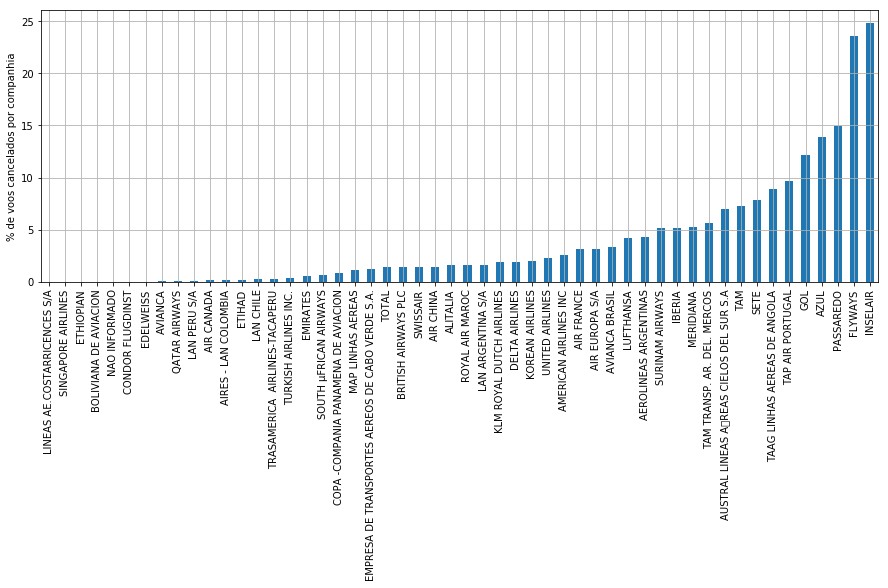

In [12]:
fig = plt.figure(figsize=(15,5)) 
perc_cancel = 100*(df['Companhia.Aerea'][df['Situacao.Voo'] == 'Cancelado'].value_counts())/(df['Companhia.Aerea'].value_counts())
perc_cancel = perc_cancel.fillna(0)
perc_cancel = perc_cancel.sort_values()
perc_cancel.plot(kind='bar')
plt.ylabel('% de voos cancelados por companhia')
plt.grid()

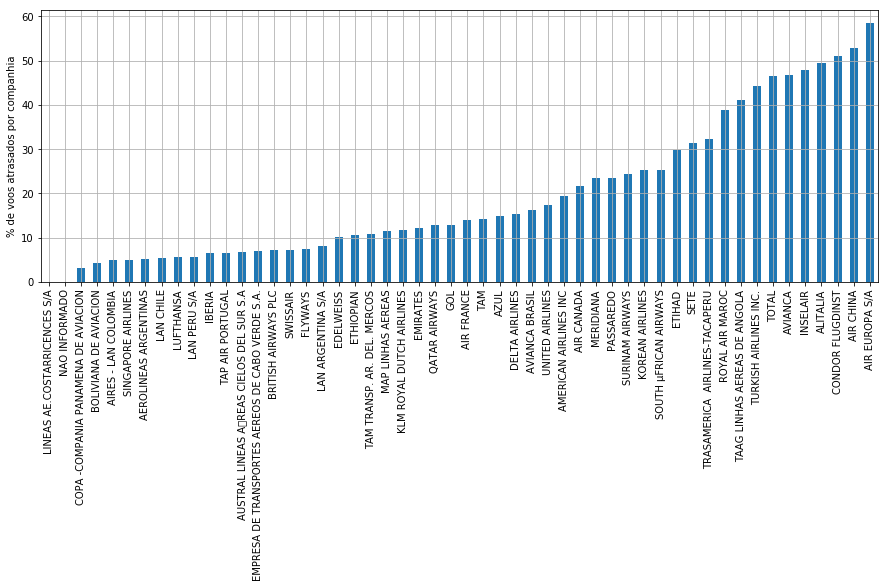

In [13]:
fig = plt.figure(figsize=(15,5)) 
perc_atras = 100*(df['Companhia.Aerea'][(df['Partida.Prevista']-df['Partida.Real'] < 0)  & (df['Situacao.Voo'] != 'Cancelado')].value_counts())/(df['Companhia.Aerea'].value_counts())
perc_atras = perc_atras.fillna(0)
perc_atras = perc_atras.sort_values()
perc_atras.plot(kind='bar')
plt.ylabel('% de voos atrasados por companhia')
plt.grid()

**Vemos que podemos separar companhias aéreas grupos definidos pela porcentagem de atrasos da companhia em relação ao número de voos realizados. É uma aproximação grosseiro mas que irá diminuir a complexidade do nosso modelo. Podemos separar em 5 grupos. **

In [14]:
perc_atras[(perc_atras >= 10) & (perc_atras < 20)]

EDELWEISS                      10.074627
ETHIOPIAN                      10.593220
TAM TRANSP. AR. DEL. MERCOS    10.863510
MAP LINHAS AEREAS              11.591979
KLM ROYAL DUTCH AIRLINES       11.822892
EMIRATES                       12.274161
QATAR AIRWAYS                  12.751992
GOL                            12.884700
AIR FRANCE                     13.899231
TAM                            14.183903
AZUL                           14.781052
DELTA AIRLINES                 15.295956
AVIANCA BRASIL                 16.290078
UNITED AIRLINES                17.366527
AMERICAN AIRLINES INC          19.322362
Name: Companhia.Aerea, dtype: float64

In [15]:
p1 = perc_atras[perc_atras < 10]
p2 = perc_atras[(perc_atras >= 10) & (perc_atras < 20)]
p3 = perc_atras[(perc_atras >= 20) & (perc_atras < 30)]
p4 = perc_atras[(perc_atras >= 30) & (perc_atras < 40)]
p5 = perc_atras[perc_atras >= 40]

In [16]:
p1.index

Index(['LINEAS AE.COSTARRICENCES S/A', 'NAO INFORMADO',
       'COPA -COMPANIA PANAMENA DE AVIACION', 'BOLIVIANA DE AVIACION',
       'AIRES - LAN COLOMBIA', 'SINGAPORE AIRLINES', 'AEROLINEAS ARGENTINAS',
       'LAN CHILE', 'LUFTHANSA', 'LAN PERU S/A', 'IBERIA', 'TAP AIR PORTUGAL',
       'AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A',
       'EMPRESA DE TRANSPORTES AEREOS DE CABO VERDE S.A.',
       'BRITISH AIRWAYS PLC', 'SWISSAIR', 'FLYWAYS', 'LAN ARGENTINA S/A'],
      dtype='object')

df['Companhia.Aerea'].replace(p1.index, 'Comp_1', inplace = True)
df['Companhia.Aerea'].replace(p2.index, 'Comp_2', inplace = True)
df['Companhia.Aerea'].replace(p3.index, 'Comp_3', inplace = True)
df['Companhia.Aerea'].replace(p4.index, 'Comp_4', inplace = True)
df['Companhia.Aerea'].replace(p5.index, 'Comp_5', inplace = True)

** Obs.: O código acima foi implementado porém verificou-se que diminuiu a eficácia do modelo. Portanto não utilizaremos essa abordagem **


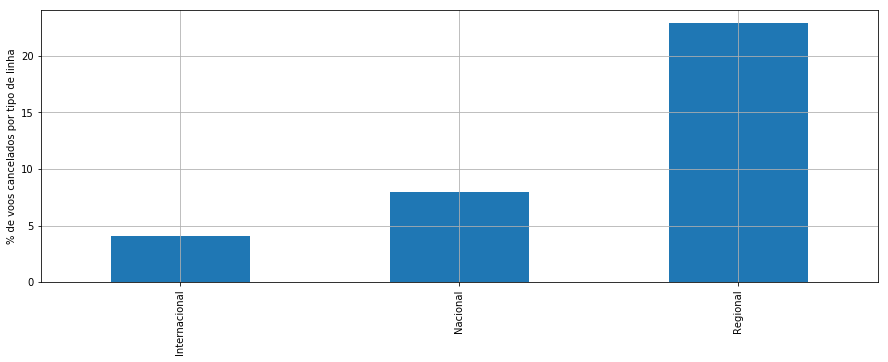

In [17]:
fig = plt.figure(figsize=(15,5)) 
perc_cancel = 100*(df['Codigo.Tipo.Linha'][df['Situacao.Voo'] == 'Cancelado'].value_counts())/(df['Codigo.Tipo.Linha'].value_counts())
perc_cancel = perc_cancel.fillna(0)
perc_cancel = perc_cancel.sort_values()
perc_cancel.plot(kind='bar')
plt.ylabel('% de voos cancelados por tipo de linha')
plt.grid()

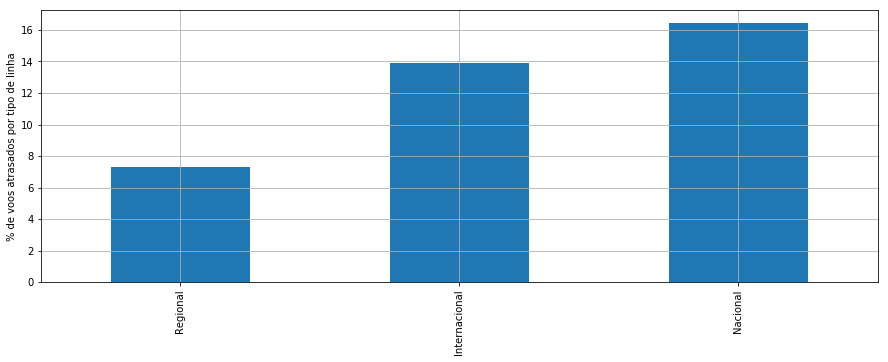

In [18]:
fig = plt.figure(figsize=(15,5)) 
perc_atras = 100*(df['Codigo.Tipo.Linha'][(df['Partida.Prevista']-df['Partida.Real'] < 0)  & (df['Situacao.Voo'] != 'Cancelado')].value_counts())/(df['Codigo.Tipo.Linha'].value_counts())
perc_atras = perc_atras.fillna(0)
perc_atras = perc_atras.sort_values()
perc_atras.plot(kind='bar')
plt.ylabel('% de voos atrasados por tipo de linha')
plt.grid()

Vemos que o atributo Codigo.Tipo.Linha não tem tanta influência na nossa saída, e além disso, a informação que ele passa já está embutida nos atributos Aeroporto.Origem e Aeroporto.Destino. Porém, testamos o modelo com e sem a presença desse atributo, e melhores resultados foram obtidos com a presença do mesmo, identificando que apesar da correlação com outras variáveis ela ainda tem um papel importante no processo de aprendizagem. 

## Tentando entender as motivações dos atrasos

In [19]:
df['Codigo.Justificativa'][(df['Partida.Prevista']-df['Partida.Real'] < 0)  & (df['Situacao.Voo'] != 'Cancelado')].value_counts()

AEROPORTO COM RESTRICOES OPERACIONAIS                                            30419
CONEXAO DE AERONAVE                                                              22778
CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO AEROPORTO INTERDITADO         21640
ANTECIPACAO DE HORARIO AUTORIZADA                                                20217
ATRASOS NAO ESPECIFICOS - OUTROS                                                 19405
DEFEITOS DA AERONAVE                                                             19272
CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO CONDICOES METEOROLOGICAS      16942
LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO                                        15086
SEGURANCA/PAX/CARGA/ALARME                                                        8207
FALHA EQUIPO AUTOMOTIVO E DE ATENDIMENTO DE PAX                                   8180
TROCA DE AERONAVE                                                                 5533
AEROPORTO ORIGEM ABAIXO DOS LIMITES        

** Os nomes dados as justificativas são de difícil compreensão, porém podemos perceber que os prinicipais motivos estão relacionados aos voos que possuem conexões, pois esses estão diretamente ligados aos atrasos na primeira parte da conexão, que podem ocorrer até mesmo em voo devido a condições meteorológicas ou ao congestionamento no aeroporto de destino. Aeroportos com condições operacionais limitadas são os principais causadores dos atrasos, além de possíveis defeitos nas aeronaves. **

Podemos portanto criar algumas variáveis de entrada fazendo inferências através das justificativas, aumentando a propabilidade de atraso caso determinada condição seja observada para a data prevista do voo. 

Podemos criar: 

* Mau_tempo (inclui ventos, chuvas fortes, nevasca, etc.): 

CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO CONDICOES METEOROLOGICAS

ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS

ATRASO AEROPORTO DE ALTERNATIVA - CONDICOES METEOROLOGICAS

* Problema_aeroporto (Aeroportos com baixa capacidade):

AEROPORTO COM RESTRICOES OPERACIONAIS

CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO AEROPORTO INTERDITADO

AEROPORTO ORIGEM ABAIXO DOS LIMITES

AEROPORTO DESTINO ABAIXO DOS LIMITES

AEROPORTO DE ORIGEM INTERDITADO 

AEROPORTO DE DESTINO INTERDITADO

CONEXAO DE AERONAVE

* Problema_aeronnave (Aeronaves): 

DEFEITOS DA AERONAVE

TROCA DE AERONAVE   

** Parece estranho usar as justificativas para treinar o modelo, porém, ao fazermos isso o que estamos dizendo na verdade é: dada as justificativas podemos inferir quais eram as condições climáticas e de operação na data do voo. Portanto, sabendo-se essas condições podemos usá-las como entradas no modelo, uma vez que quando quisermos fazer uma nova predição teremos acesso a esses dados antes de acontecer o voo. **

### Mau tempo

In [20]:
a = df['Codigo.Justificativa'] == 'CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO CONDICOES METEOROLOGICAS'
b = df['Codigo.Justificativa'] == 'ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS'  
c = df['Codigo.Justificativa'] == 'ATRASO AEROPORTO DE ALTERNATIVA - CONDICOES METEOROLOGICAS'      
  

In [21]:
d =  df['Codigo.Justificativa'][a | b | c] 

In [22]:
df.insert(1,'Mau_tempo', d)

In [23]:
df['Mau_tempo'].value_counts()

CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO CONDICOES METEOROLOGICAS    17144
ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS                                1240
ATRASO AEROPORTO DE ALTERNATIVA - CONDICOES METEOROLOGICAS                       124
Name: Mau_tempo, dtype: int64

### Problema no aeroporto

In [24]:
df['Mau_tempo'][~df['Mau_tempo'].isnull()] = 1  # not nan
df['Mau_tempo'][df['Mau_tempo'].isnull()] = 0   # nan



C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
a = df['Codigo.Justificativa'] == 'AEROPORTO COM RESTRICOES OPERACIONAIS'
b = df['Codigo.Justificativa'] == 'CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO AEROPORTO INTERDITADO'  
c = df['Codigo.Justificativa'] == 'AEROPORTO ORIGEM ABAIXO DOS LIMITES' 
d = df['Codigo.Justificativa'] == 'AEROPORTO DESTINO ABAIXO DOS LIMITES'  
e = df['Codigo.Justificativa'] == 'AEROPORTO DE ORIGEM INTERDITADO'
f = df['Codigo.Justificativa'] == 'AEROPORTO DE DESTINO INTERDITADO'
g = df['Codigo.Justificativa'] == 'CONEXAO DE AERONAVE'
  

In [26]:
h =  df['Codigo.Justificativa'][a | b | c | d | e | f | g] 

In [27]:
df.insert(1,'Problema_aeroporto', h)

In [28]:
df['Problema_aeroporto'][~df['Problema_aeroporto'].isnull()] = 1  # not nan
df['Problema_aeroporto'][df['Problema_aeroporto'].isnull()] = 0   # nan


C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Problema na aeronave

In [29]:
a = df['Codigo.Justificativa'] == 'DEFEITOS DA AERONAVE'
b = df['Codigo.Justificativa'] == 'TROCA DE AERONAVE'  


In [30]:
c =  df['Codigo.Justificativa'][a | b] 

In [31]:
df.insert(1,'Problema_aeronave', c)

In [32]:
df['Problema_aeronave'][~df['Problema_aeronave'].isnull()] = 1  # not nan
df['Problema_aeronave'][df['Problema_aeronave'].isnull()] = 0   # nan

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Definindo o atributo de saída

In [33]:
df['Situacao.Voo'][(df['Situacao.Voo'] == 'Realizado') | (df['Situacao.Voo'] == 'Cancelado')] = 0

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df['Situacao.Voo'][(df['Partida.Prevista']-df['Partida.Real'] < 0) & (df['Situacao.Voo'] != 'Cancelado')] = 1

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


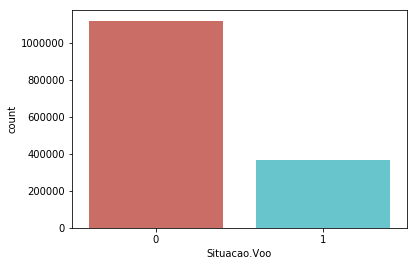

In [35]:
sb.countplot(x='Situacao.Voo',data=df, palette='hls')

Vemnos que nossa variável Situacao.Voo agora é binária. 0 representa os voos que não atrasaram e 1 representam os voos que atrasaram. Notamos também que a classe está desbalanceada. Pode ser necessário balanceá-la para obter melhores resultados. Faremos isso posteriormente. 

Nosso modelo tem que ser capaz de prever a partir de novas entradas. Portando não podemos treiná-lo com atributos que só serão conhecidos após ação ter sido realizada, como *Partida.Real e Codigo.Justificativa*. Devemos então eliminar essas variáveis para treinar o modelo. 

In [36]:
#df.drop(['Chegada.Real', 'Chegada.Prevista', 'Codigo.Tipo.Linha'], axis=1, inplace=True)
df.drop(['Chegada.Real', 'Chegada.Prevista'], axis=1, inplace=True)

In [37]:
df.drop(['Partida.Real', 'Codigo.Justificativa'], axis=1, inplace=True)

In [38]:
df.head()

,Companhia.Aerea,Problema_aeronave,Problema_aeroporto,Mau_tempo,Codigo.Tipo.Linha,Partida.Prevista,Situacao.Voo,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,0,0,0,Internacional,1454144280000000000,0,Afonso Pena,Salgado Filho
1,AMERICAN AIRLINES INC,0,0,0,Internacional,1452687180000000000,0,Salgado Filho,Miami
2,AMERICAN AIRLINES INC,0,0,0,Internacional,1454069580000000000,0,Salgado Filho,Miami
3,AMERICAN AIRLINES INC,0,0,0,Internacional,1453205580000000000,0,Salgado Filho,Miami
4,AMERICAN AIRLINES INC,0,0,0,Internacional,1454155980000000000,0,Salgado Filho,Miami


In [39]:
df.isnull().sum()

Companhia.Aerea       0
Problema_aeronave     0
Problema_aeroporto    0
Mau_tempo             0
Codigo.Tipo.Linha     0
Partida.Prevista      0
Situacao.Voo          0
Aeroporto.Origem      0
Aeroporto.Destino     1
dtype: int64

In [40]:
df = df.dropna(axis=0, how='any')

In [41]:
df['Partida.Prevista'] = pd.to_datetime(df['Partida.Prevista'])

In [42]:
Dia = df['Partida.Prevista'].apply(lambda x: x.day)
Mes = df['Partida.Prevista'].apply(lambda x: x.month)
Hora = df['Partida.Prevista'].apply(lambda x: x.hour)

df.insert(1,'Dia',Dia)
df.insert(2,'Mes',Mes)
df.insert(3,'Hora',Hora)

In [43]:
df

,Companhia.Aerea,Dia,Mes,Hora,Problema_aeronave,Problema_aeroporto,Mau_tempo,Codigo.Tipo.Linha,Partida.Prevista,Situacao.Voo,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,30,1,8,0,0,0,Internacional,2016-01-30 08:58:00,0,Afonso Pena,Salgado Filho
1,AMERICAN AIRLINES INC,13,1,12,0,0,0,Internacional,2016-01-13 12:13:00,0,Salgado Filho,Miami
2,AMERICAN AIRLINES INC,29,1,12,0,0,0,Internacional,2016-01-29 12:13:00,0,Salgado Filho,Miami
3,AMERICAN AIRLINES INC,19,1,12,0,0,0,Internacional,2016-01-19 12:13:00,0,Salgado Filho,Miami
4,AMERICAN AIRLINES INC,30,1,12,0,0,0,Internacional,2016-01-30 12:13:00,0,Salgado Filho,Miami
5,AMERICAN AIRLINES INC,3,1,23,0,0,0,Internacional,2016-01-03 23:05:00,0,Miami,Afonso Pena
6,AMERICAN AIRLINES INC,5,1,23,0,0,0,Internacional,2016-01-05 23:05:00,1,Miami,Afonso Pena
7,AMERICAN AIRLINES INC,18,1,12,0,1,0,Internacional,2016-01-18 12:13:00,1,Salgado Filho,Miami
8,AMERICAN AIRLINES INC,22,1,23,0,0,0,Internacional,2016-01-22 23:05:00,0,Miami,Afonso Pena
9,AMERICAN AIRLINES INC,15,1,23,0,0,0,Internacional,2016-01-15 23:05:00,1,Miami,Afonso Pena


In [44]:
df.head()

,Companhia.Aerea,Dia,Mes,Hora,Problema_aeronave,Problema_aeroporto,Mau_tempo,Codigo.Tipo.Linha,Partida.Prevista,Situacao.Voo,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,30,1,8,0,0,0,Internacional,2016-01-30 08:58:00,0,Afonso Pena,Salgado Filho
1,AMERICAN AIRLINES INC,13,1,12,0,0,0,Internacional,2016-01-13 12:13:00,0,Salgado Filho,Miami
2,AMERICAN AIRLINES INC,29,1,12,0,0,0,Internacional,2016-01-29 12:13:00,0,Salgado Filho,Miami
3,AMERICAN AIRLINES INC,19,1,12,0,0,0,Internacional,2016-01-19 12:13:00,0,Salgado Filho,Miami
4,AMERICAN AIRLINES INC,30,1,12,0,0,0,Internacional,2016-01-30 12:13:00,0,Salgado Filho,Miami


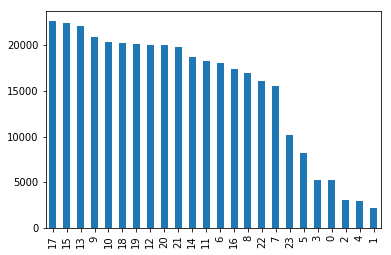

In [45]:
df['Hora'][df['Situacao.Voo'] == 1].value_counts().plot(kind='bar')

In [46]:
df['Hora'].replace([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], 'Hora_Pico', inplace = True)
df['Hora'].replace([1,2,3,4,5,23], 'Hora_Baixa', inplace = True)


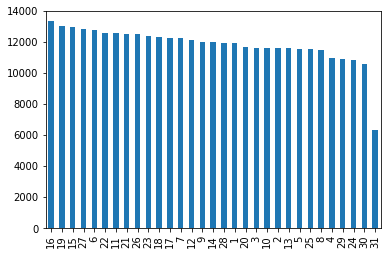

In [47]:
df['Dia'][df['Situacao.Voo'] == 1].value_counts().plot(kind='bar')

Numa análise simplista vemos que o dia do mês não tem muita influência nos atrasos. Talvez se verificássemos vésperas de datas festivas teríamos dados mais consisos, porém deixaremos esse passo para um próximo estudo. Podemos então eliminar a variável Dia. 

In [48]:
df.drop(df[['Dia']], axis=1, inplace=True)

In [49]:
df.head()

,Companhia.Aerea,Mes,Hora,Problema_aeronave,Problema_aeroporto,Mau_tempo,Codigo.Tipo.Linha,Partida.Prevista,Situacao.Voo,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,1,Hora_Pico,0,0,0,Internacional,2016-01-30 08:58:00,0,Afonso Pena,Salgado Filho
1,AMERICAN AIRLINES INC,1,Hora_Pico,0,0,0,Internacional,2016-01-13 12:13:00,0,Salgado Filho,Miami
2,AMERICAN AIRLINES INC,1,Hora_Pico,0,0,0,Internacional,2016-01-29 12:13:00,0,Salgado Filho,Miami
3,AMERICAN AIRLINES INC,1,Hora_Pico,0,0,0,Internacional,2016-01-19 12:13:00,0,Salgado Filho,Miami
4,AMERICAN AIRLINES INC,1,Hora_Pico,0,0,0,Internacional,2016-01-30 12:13:00,0,Salgado Filho,Miami


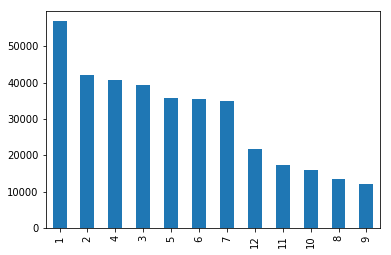

In [51]:
df['Mes'][df['Situacao.Voo'] == 1].value_counts().plot(kind='bar')

Podemos perceber que janeiro é o mês que possui a maior quantidade de atrasos. Podemos então através da observação do gráfico Mes x Atrasos, dividir o atributo Mes em 3 grupos. Mes_Alto, Mes_Medio e Mes_Baixo. 


In [52]:
df['Mes'].replace(1, 'Mes_Alto', inplace = True)
df['Mes'].replace([2,3,4,5,6,7], 'Mes_Medio', inplace = True)
df['Mes'].replace([8,9,10,11,12], 'Mes_Baixo', inplace = True)

## Balanceando os dados:

Conforme dito antes, os dados estão desbalanceados, portanto um balanceamento deve melhorar a eficácia do modelo. Quando temos um dataset desbalanceado corremos o risco de o nosso modelo ignorar a classe minoritária em favor da classe majoritária. Isso faz com que o modelo tenha uma boa acurácia, porém seria um erro analisar a eficácia do mesmo por esse parâmetro, uma vez que temos um problema de classificação e não podemos ignorar uma classe, pelo contrário.

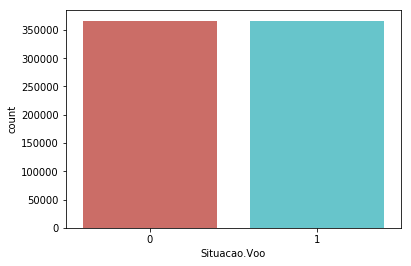

In [53]:
remove_n = (df[df['Situacao.Voo'] == 0].shape[0] - df[df['Situacao.Voo'] == 1].shape[0])
drop_indices = np.random.choice(df[df['Situacao.Voo'] == 0].index, remove_n, replace=False)
df = df.drop(drop_indices)
sb.countplot(x='Situacao.Voo',data=df, palette='hls')

## Criando o modelo
1º: Separar o conjunto em variavel resposta e variaveis de treinamento

2º: Dividir em treino e teste (teste com 30%)

In [54]:
X = df.drop(['Situacao.Voo'],axis=1)
X.drop(X[['Partida.Prevista']], axis=1, inplace=True)
X.head()

,Companhia.Aerea,Mes,Hora,Problema_aeronave,Problema_aeroporto,Mau_tempo,Codigo.Tipo.Linha,Aeroporto.Origem,Aeroporto.Destino
0,AMERICAN AIRLINES INC,Mes_Alto,Hora_Pico,0,0,0,Internacional,Afonso Pena,Salgado Filho
6,AMERICAN AIRLINES INC,Mes_Alto,Hora_Baixa,0,0,0,Internacional,Miami,Afonso Pena
7,AMERICAN AIRLINES INC,Mes_Alto,Hora_Pico,0,1,0,Internacional,Salgado Filho,Miami
9,AMERICAN AIRLINES INC,Mes_Alto,Hora_Baixa,0,0,0,Internacional,Miami,Afonso Pena
10,AMERICAN AIRLINES INC,Mes_Alto,Hora_Pico,0,1,0,Internacional,Afonso Pena,Salgado Filho


In [55]:
y = df.loc[:,'Situacao.Voo']
y.head()

0     0
6     1
7     1
9     1
10    1
Name: Situacao.Voo, dtype: object

In [56]:
y=y.astype('int')

In [57]:
display(X.shape)
display(y.shape)

(732586, 9)

(732586,)

### Transformando as variáveis categóricas em números binários 

In [58]:
X = pd.get_dummies(X)
X = X.values

### Separando os dados de treino e de teste

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

### Testando o modelo: 

** Regressão Logística ** 

In [60]:
log_reg = LogisticRegression(class_weight = {})

In [61]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print('DecisionTree\nAcurácia: {0:.2f}'.format(metrics.accuracy_score(y_test, y_pred)*100), '%\n')

             precision    recall  f1-score   support

          0       0.66      0.85      0.75    110091
          1       0.80      0.57      0.66    109685

avg / total       0.73      0.71      0.70    219776

DecisionTree
Acurácia: 71.09 %



In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[94093, 15998],
       [47532, 62153]], dtype=int64)

** Árvore de decisão ** 


In [72]:
from sklearn.tree import DecisionTreeClassifier
Classif_Tree = DecisionTreeClassifier()


In [73]:
Classif_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred = Classif_Tree.predict(X_test)
print(classification_report(y_test, y_pred))
print('DecisionTree\nAcurácia: {0:.2f}'.format(metrics.accuracy_score(y_test, y_pred)*100), '%\n')

             precision    recall  f1-score   support

          0       0.72      0.85      0.78    110091
          1       0.81      0.67      0.73    109685

avg / total       0.77      0.76      0.76    219776

DecisionTree
Acurácia: 75.84 %



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[93242, 16849],
       [36252, 73433]], dtype=int64)

** Naive Bayes ** 

In [68]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()


In [69]:
GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [70]:
y_pred = pd.Series(GNB.predict(X_test))
print(classification_report(y_test, y_pred))
print('GaussianNB\nAcurácia: {0:.2f}'.format(metrics.accuracy_score(y_test, y_pred)*100), '%\n')

             precision    recall  f1-score   support

          0       0.66      0.71      0.68    110091
          1       0.68      0.63      0.66    109685

avg / total       0.67      0.67      0.67    219776

GaussianNB
Acurácia: 67.10 %



In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[78153, 31938],
       [40360, 69325]], dtype=int64)

## Melhor modelo 

Para a ideia inicial do projeto propusemos primeiramente um problema de classificação, onde o target era prever se determinado voo iria atrasar ou não. Para isso escolhemos três algoritmos clássicos e simples: Regressão Logística, Árvore de decisão e Naive Bayes. Por ser um dataset muito grande e termos um tempo reduzido para a entrega do projeto, preferimos utilizar esses modelos mais simples. Obtivemos o melhor resultado com o algoritmo **Árvore de decisão**, apresentando valores aceitáveis. É imortante notar que o recall foi um pouco baixo, o que é pior para o nosso objetivo, uma vez que o foco é avisar aos clientes sobre a probabilidade de atrasos, e não o contrário. 

## Validação

RL: 0.710037 (0.002772)
TDD: 0.752785 (0.002940)
NB: 0.682145 (0.002359)


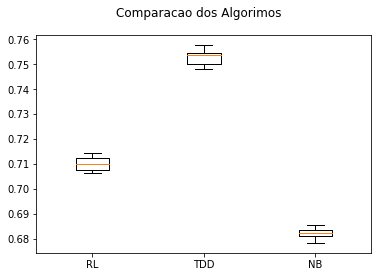

In [83]:
from sklearn.model_selection import KFold, cross_val_score

modelos = []
modelos.append(('RL', LogisticRegression()))
modelos.append(('TDD', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))


results = []
names = []
seed = 7
scoring = 'accuracy'
for name, modelo in modelos:
	kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = sklearn.model_selection.cross_val_score(modelo, X_test, y_test, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure()
fig.suptitle('Comparacao dos Algorimos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Conforme previsto, podemos comprovar através dos algoritmos de validação KFold e CrossValidation que o algoritmo ** Árvore de Decisão ** realmente é o melhor entre os modelos escolhidos. 